# Project 2: Sales Performance Analysis

##  Objective:
Analyze sales data to identify trends, relationships, and factors affecting sales performance. Build a simple predictive model using linear regression.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Step 1: Load the Dataset

In [25]:
df = pd.read_csv("Project2_sales_data.csv")
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Product A,East,200,50,0.10,Furniture,2023-01-15
1,Product B,West,300,80,0.20,Technology,2023-02-20
2,Product C,South,150,30,0.05,Office Supplies,2023-03-10
3,Product D,North,400,120,0.15,Technology,2023-04-05
4,Product E,East,100,20,0.00,Furniture,2023-05-12


## Step 2: Data Cleaning

- Check and handle missing values
- Remove duplicates
- Convert date column to datetime format

In [26]:
df.isnull().sum()
# Fill missing numeric values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

#convert date
df['Date'] = pd.to_datetime(df['Date'])

## Step 3: Exploratory Data Analysis (EDA)

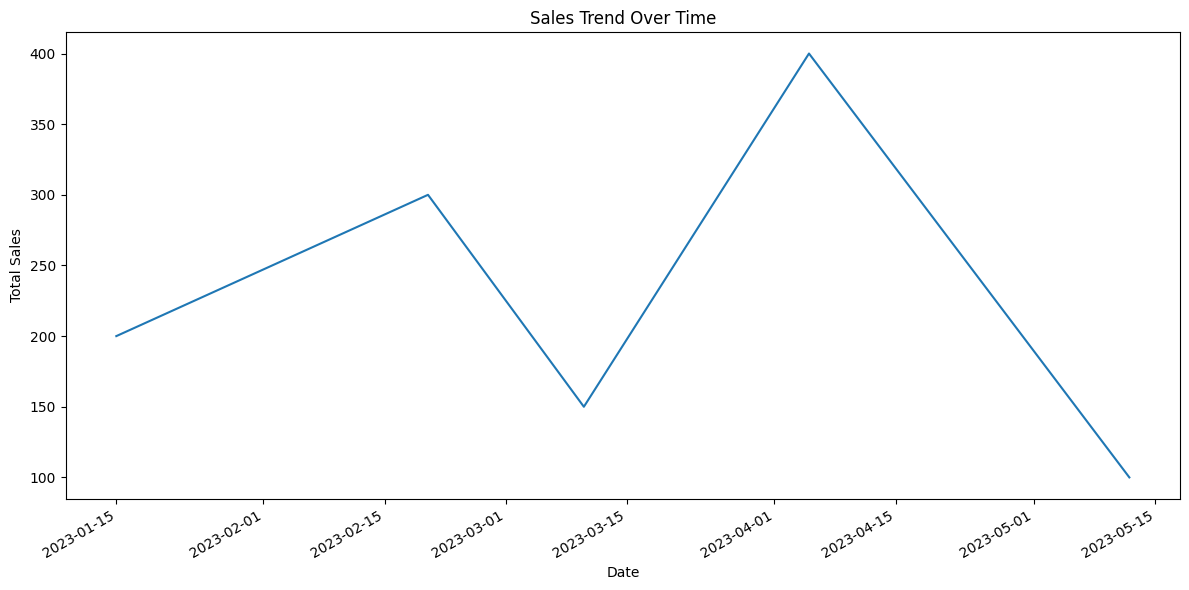

In [27]:
# Sales over time
plt.figure(figsize=(12,6))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

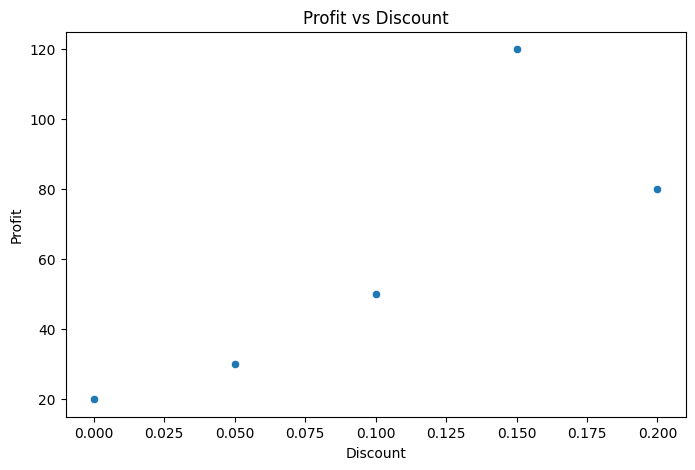

In [28]:
#Profit Vs Discount
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Profit vs Discount")
plt.show()

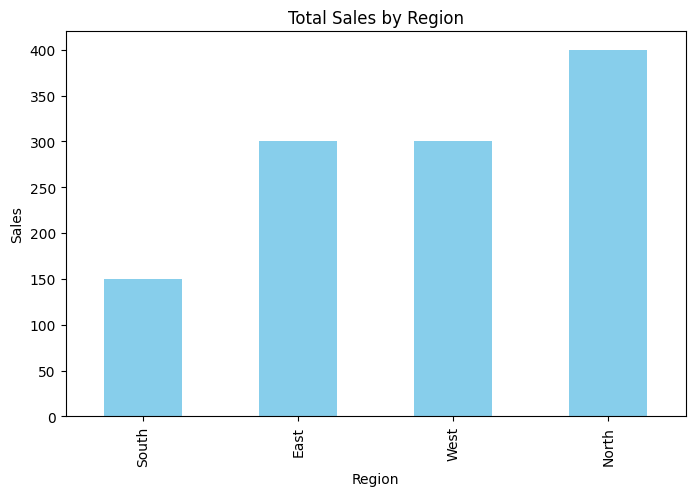

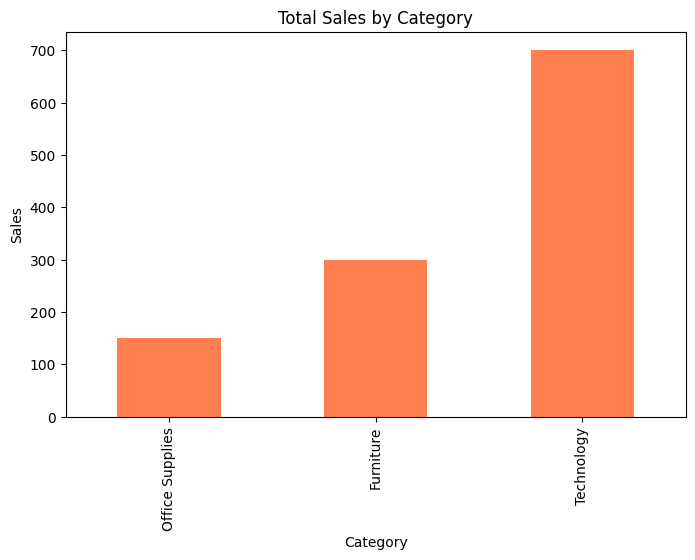

In [29]:
# Sales by Region
plt.figure(figsize=(8,5))
df.groupby('Region')['Sales'].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# Sales by Category
plt.figure(figsize=(8,5))
df.groupby('Category')['Sales'].sum().sort_values().plot(kind='bar', color='coral')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

## Step 4: Predictive Modeling

Train a Linear Regression model to predict Sales using Profit and Discount.

In [30]:
# Train the model

# Define features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [31]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9100000000000001
Mean Squared Error: 899.9999999999983


## Step 5: Insights & Recommendations

- 📈 Sales trend increases in certain months — consider seasonal marketing.
- ❌ Higher discounts don't always lead to profit — optimize discount strategies.
- 🧠 The Linear Regression model gives a basic prediction of Sales using Profit and Discount.
- 🌍 Top regions and categories can be prioritized for sales campaigns.